In [264]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator


In [265]:
number_of_points = 9
small_range = -1.0
large_range = 1.0

xcoordinates = np.linspace(small_range, large_range, num=number_of_points)
ycoordinates = np.linspace(small_range, large_range, num=number_of_points)

xcoord_mesh, ycoord_mesh = np.meshgrid(xcoordinates, ycoordinates)

directory = '/Users/vaibhavsingh/Desktop/TensorFlowASR/examples/contextnet/contextnet_visualisation/checkpoints_lrcn_lists'
parent_directory = '/Users/vaibhavsingh/Desktop/TensorFlowASR/examples/contextnet'

figure_directory = "figs_3rd_june_lrcn"


In [181]:
m = "/Users/vaibhavsingh/Desktop/TensorFlowASR/examples/contextnet/contextnet_visualisation/checkpoints_cn_lists/model_all_re_cn_01.pkl"

print("filenmes ", m)
with open(m, "rb") as f:
    x_temp = pickle.load(f)

filenmes  /Users/vaibhavsingh/Desktop/TensorFlowASR/examples/contextnet/contextnet_visualisation/checkpoints_cn_lists/model_all_re_cn_01.pkl


In [182]:
loss_list = x_temp['loss_list'][0]

acc_list_greedy_char = x_temp['greedy_char'][0]
acc_list_greedy_wer = x_temp['greedy_wer'][0]
acc_list_beam_wer = x_temp['beam_wer'][0]
acc_list_beam_char = x_temp['beam_char'][0]

acc_list = acc_list_beam_char

In [190]:
#data
x=xcoord_mesh
y=ycoord_mesh
z=(loss_list.max() - loss_list.min()) * (acc_list - acc_list.min()) / (acc_list.max() - acc_list.min() + 1e-8) + loss_list.min()
z2 = loss_list



In [210]:
X = x
Y=y
Z = z2

print(Z.shape)
# print(Y)
# print(Z)

(9, 9)


In [211]:
print(z2.shape)

(9, 9)


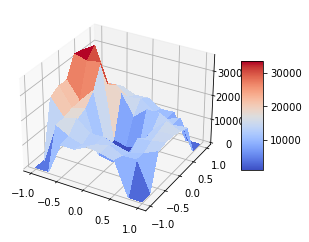

In [228]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})



# Plot the surface.
surf = ax.plot_surface(x, y, z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [233]:
data = [go.Surface(
            x=xcoord_mesh, y=ycoord_mesh, z=np.log(loss_list), cmin=0,cmax=12, colorscale='Jet', opacity=0.9,
            contours=go.surface.Contours(z=go.surface.contours.Z(show=True, usecolormap=True, project=dict(z=True), ),
                                         )
        )
    ]
layout = go.Layout(title='Log Scale Loss / Accuracy', autosize=False,
                   scene=dict(dict(
                       xaxis=dict(range=[-1, 1],
                                  backgroundcolor="rgb(163, 221, 240)",
                                  gridcolor="white",
                                  showbackground=True,
                                  zerolinecolor="white", ),
                       yaxis=dict(range=[-1, 1],
                                  backgroundcolor="rgb(91, 122, 133)",
                                  gridcolor="white",
                                  showbackground=True,
                                  zerolinecolor="white", ),
                       zaxis=dict(range=[1, 11],
                                  backgroundcolor="rgb(204, 231, 240)",
                                  gridcolor="white",
                                  showbackground=True,
                                  zerolinecolor="white", )),
                       camera=dict(eye=dict(x=2, y=2, z=1.5))),
                   margin=dict(l=100, r=100, b=10, t=40),
                   width=550, height=550)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<ipython-input-233-8292c0c97450>:2: RuntimeWarning:

divide by zero encountered in log



In [140]:
z_list = z
print(z_list)

[[    0.             0.         12922.43261719 12699.6328125
  15405.6953125  14545.625      13190.45507812     0.
      0.        ]
 [    0.         16127.1953125  13228.74804688 11295.65234375
  13286.62304688 14771.6171875  12027.94921875 12165.3828125
      0.        ]
 [23346.80273438 16556.546875   17860.58007812 13312.41894531
  13574.12988281 11514.6484375  10171.92382812 11755.29589844
  14325.74121094]
 [25486.84375    17690.43164062 19414.35546875  1724.97924805
    610.46020508  2319.2980957  13337.46289062 13879.21582031
  15163.39550781]
 [25286.72851562 18082.60742188 23832.45898438   755.76538086
     56.51605988   798.55554199 10451.82226562 15058.72265625
  15109.27246094]
 [33497.93359375 32032.87109375 33016.4140625   2036.6496582
    628.37426758  2038.11462402 11019.37597656 16395.71484375
  13954.59960938]
 [32771.78125    35974.96875    21390.36914062 19276.61328125
  10601.12988281 15361.12597656 15398.92871094 12086.00097656
  12670.61328125]
 [    0.         

In [144]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
# fig = plotly.tools.make_subplots(rows=1, cols=3)

# fig = make_subplots(rows=1, cols=2)
f = go.Figure(data = go.Contour(z=z_list))
# f.update_layout(
#     width=500,
#     height=500)

f.show()

# fig.append_trace(f, row=1, col=1)

# fig.append_trace(surf, row=1, col=2)

In [158]:
print(type(x_list))

<class 'list'>


In [148]:
print(y_list)

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [152]:
z_list1 = []
for i in z:
    z_list2 = []
    for j in i:
        z_list2.append(j)
    z_list1.append(z_list2)


In [153]:
print(z_list1)

[[0.0, 0.0, 12922.4326171875, 12699.6328125, 15405.6953125, 14545.625, 13190.455078125, 0.0, 0.0], [0.0, 16127.1953125, 13228.748046875, 11295.65234375, 13286.623046875, 14771.6171875, 12027.94921875, 12165.3828125, 0.0], [23346.802734375, 16556.546875, 17860.580078125, 13312.4189453125, 13574.1298828125, 11514.6484375, 10171.923828125, 11755.2958984375, 14325.7412109375], [25486.84375, 17690.431640625, 19414.35546875, 1724.979248046875, 610.460205078125, 2319.298095703125, 13337.462890625, 13879.2158203125, 15163.3955078125], [25286.728515625, 18082.607421875, 23832.458984375, 755.765380859375, 56.51605987548828, 798.5555419921875, 10451.822265625, 15058.72265625, 15109.2724609375], [33497.93359375, 32032.87109375, 33016.4140625, 2036.649658203125, 628.374267578125, 2038.1146240234375, 11019.3759765625, 16395.71484375, 13954.599609375], [32771.78125, 35974.96875, 21390.369140625, 19276.61328125, 10601.1298828125, 15361.1259765625, 15398.9287109375, 12086.0009765625, 12670.61328125], [

In [256]:
figg = go.Figure(data = go.Contour(z=np.log(z_list1), colorscale='Electric'))
figg.show()


<ipython-input-256-2c42488bb0b8>:1: RuntimeWarning:

divide by zero encountered in log



In [258]:
def give_list(x):
    x_list = []
    for i in x:
        for j in i:
            x_list.append(j)
    return x_list

x_list = give_list(x)
y_list = give_list(y)

z_list = []

for i in z:
    tmp = []
    for k in i:
        tmp.append(k)
    z_list.append(tmp)

print(z_list)



[[0.0, 0.0, 792.6264501271647, 434.66497411956493, 792.6264501271647, 664.7821161658268, 664.7821161658268, 0.0, 0.0], [0.0, 588.0764021504061, 690.3514261387854, 562.509308080903, 536.9399981079442, 792.6264501271647, 613.6457121233649, 792.6264501271647, 0.0], [1022.7435921734266, 946.0378781580059, 818.193544196668, 3681.8720568367335, 7056.92347351524, 1073.8799962158885, 715.9207361117442, 588.0764021504061, 306.82285606168244], [1022.7435921734266, 920.4685681850473, 5497.242099137325, 11608.127694494558, 21605.435394665285, 10201.857748147486, 4551.204220979319, 409.09788005006175, 383.52857007710304], [1022.7435921734266, 894.8992582120886, 6085.318501287731, 21528.729680649863, 35974.96837823309, 21170.77042054572, 8591.037753823652, 306.82285606168244, 511.3706881349855], [946.0378781580059, 946.0378781580059, 5752.92633525309, 8744.449181854494, 20505.987196428166, 10048.446320116644, 2505.7192525359214, 767.0571401542061, 460.23428409252364], [946.0378781580059, 1022.743592

In [244]:
print(x_list)
print()
print(y_list)

[-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [268]:
data = [go.surface.Contours(x=xcoord_mesh, y=ycoord_mesh, z=loss_list)]

layout = go.Layout(title='Loss / Accuracy', autosize=True)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

ValueError: 
    Invalid value of type 'numpy.ndarray' received for the 'x' property of surface.contours
        Received value: array([[-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]])

    The 'x' property is an instance of X
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.surface.contours.X`
      - A dict of string/value properties that will be passed
        to the X constructor

        Supported dict properties:
            
            color
                Sets the color of the contour lines.
            end
                Sets the end contour level value. Must be more
                than `contours.start`
            highlight
                Determines whether or not contour lines about
                the x dimension are highlighted on hover.
            highlightcolor
                Sets the color of the highlighted contour
                lines.
            highlightwidth
                Sets the width of the highlighted contour
                lines.
            project
                :class:`plotly.graph_objects.surface.contours.x
                .Project` instance or dict with compatible
                properties
            show
                Determines whether or not contour lines about
                the x dimension are drawn.
            size
                Sets the step between each contour level. Must
                be positive.
            start
                Sets the starting contour level value. Must be
                less than `contours.end`
            usecolormap
                An alternate to "color". Determines whether or
                not the contour lines are colored using the
                trace "colorscale".
            width
                Sets the width of the contour lines.


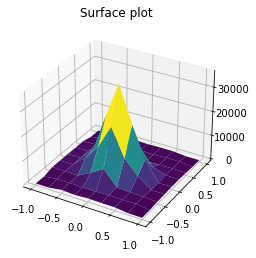

In [47]:
plt.subplot(133)
plt.title("3d surface")
x=xcoord_mesh
y=ycoord_mesh
z=(loss_list.max() - loss_list.min()) * (acc_list - acc_list.min()) / (acc_list.max() - acc_list.min() + 1e-8) + loss_list.min()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()


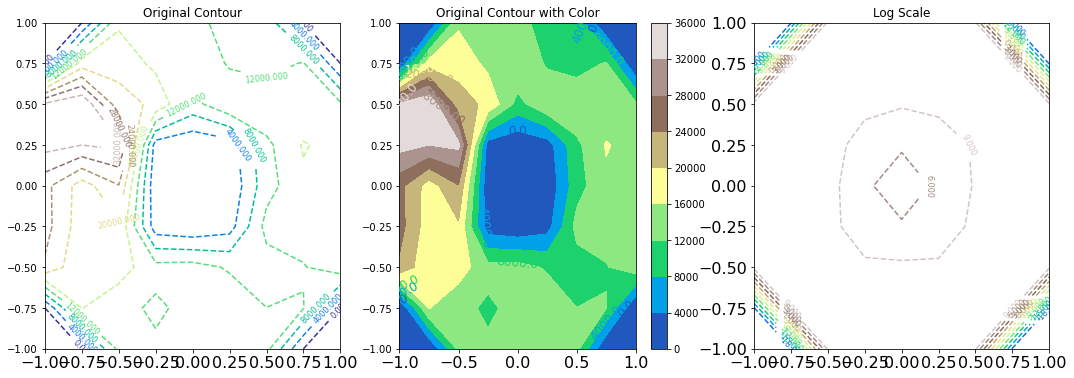

In [295]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.title("Original Contour")
CS = plt.contour(xcoord_mesh, ycoord_mesh, loss_list,  10, zorder=1, cmap='terrain', linestyles='--')
plt.clabel(CS, inline=1, fontsize=8)
plt.xticks(fontsize=16)

plt.subplot(132)
plt.title("Original Contour with Color")
plt.contour(xcoord_mesh, ycoord_mesh, loss_list,  10, zorder=1, cmap='terrain', linestyles='--')
CS = plt.contourf(xcoord_mesh, ycoord_mesh, loss_list, 10, zorder=1, cmap='terrain', linestyles='--')   
plt.clabel(CS, fontsize=12,inline=0,fmt = '%2.1f')
plt.colorbar(CS)
plt.xticks(fontsize=16)

plt.subplot(133)
plt.title("Log Scale")
CS = plt.contour(xcoord_mesh, ycoord_mesh, np.log(loss_list+1e-8),10,zorder=1, cmap='terrain', linestyles='--'); 
plt.clabel(CS, fontsize=8,inline=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig(title)
plt.show()
    

In [283]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])
           
           

fig.add_trace(
    go.Surface(
            x=xcoord_mesh, y=ycoord_mesh, z=np.log(loss_list), cmin=0,cmax=12, colorscale='Jet', opacity=0.9,
            contours=go.surface.Contours(z=go.surface.contours.Z(show=True, usecolormap=True, project=dict(z=True), ),
                                         )
        ),
    row=1, col=1
)

fig.add_trace(
    go.Surface(
            x=xcoord_mesh, y=ycoord_mesh, z=np.log(loss_list), cmin=0,cmax=12, colorscale='Jet', opacity=0.9,
            contours=go.surface.Contours(z=go.surface.contours.Z(show=True, usecolormap=True, project=dict(z=True), ),
                                         )
        ),
    row=1, col=2
)



fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

<ipython-input-283-11dffc3bb872>:9: RuntimeWarning:

divide by zero encountered in log

<ipython-input-283-11dffc3bb872>:18: RuntimeWarning:

divide by zero encountered in log



In [ ]:
data = [go.Surface(
            x=xcoord_mesh, y=ycoord_mesh, z=np.log(loss_list), cmin=0,cmax=12, colorscale='Jet', opacity=0.9,
            contours=go.surface.Contours(z=go.surface.contours.Z(show=True, usecolormap=True, project=dict(z=True), ),
                                         )
        )
    ]
layout = go.Layout(title='Log Scale Loss / Accuracy', autosize=False,
                   scene=dict(dict(
                       xaxis=dict(range=[-1, 1],
                                  backgroundcolor="rgb(163, 221, 240)",
                                  gridcolor="white",
                                  showbackground=True,
                                  zerolinecolor="white", ),
                       yaxis=dict(range=[-1, 1],
                                  backgroundcolor="rgb(91, 122, 133)",
                                  gridcolor="white",
                                  showbackground=True,
                                  zerolinecolor="white", ),
                       zaxis=dict(range=[1, 11],
                                  backgroundcolor="rgb(204, 231, 240)",
                                  gridcolor="white",
                                  showbackground=True,
                                  zerolinecolor="white", )),
                       camera=dict(eye=dict(x=2, y=2, z=1.5))),
                   margin=dict(l=100, r=100, b=10, t=40),
                   width=550, height=550)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

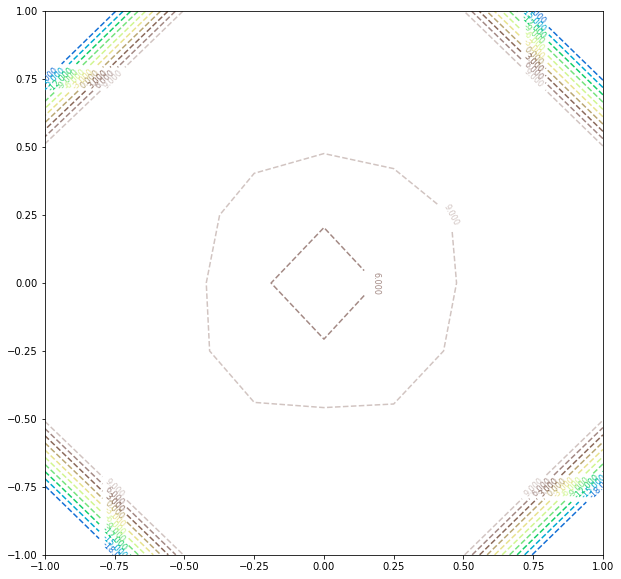

In [293]:
plt.figure(figsize=(10, 10))
CS = plt.contour(xcoord_mesh, ycoord_mesh, np.log(loss_list + 1e-8), 10, zorder=1, cmap='terrain', linestyles='--');
plt.clabel(CS, fontsize=8)
plt.show()
# plt.savefig("abcccc.png")